# IRIS FLOWER CLASSIFICATION

I have used the Iris dataset to develop a model that can classify iris flowers into different species based on their sepal and petal measurements. A lot of other approaches are there, model is choosed according to the user's requirements and needs

In [121]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [122]:
iris = pd.read_csv("IRIS.csv")
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [123]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [124]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Exploratory Data Analysis

Check for null values

In [125]:
iris.isnull().sum()
# There are no null values so we will go further and explore the relationships between variables

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: xlabel='sepal_length', ylabel='Count'>

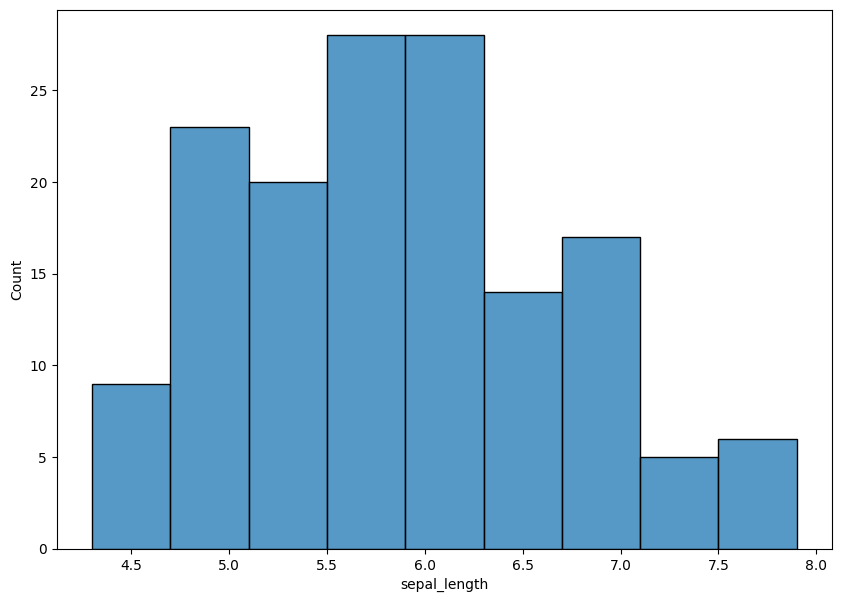

In [126]:
plt.figure(figsize=(10, 7))
sns.histplot(iris, x='sepal_length')

<Figure size 1000x700 with 0 Axes>

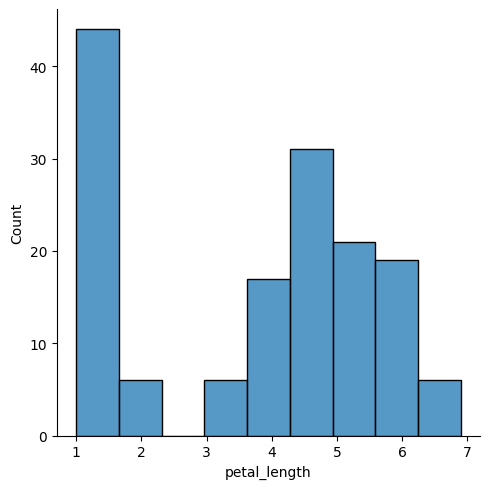

In [127]:
plt.figure(figsize=(10, 7))
sns.displot(iris, x='petal_length')

<Figure size 1000x700 with 0 Axes>

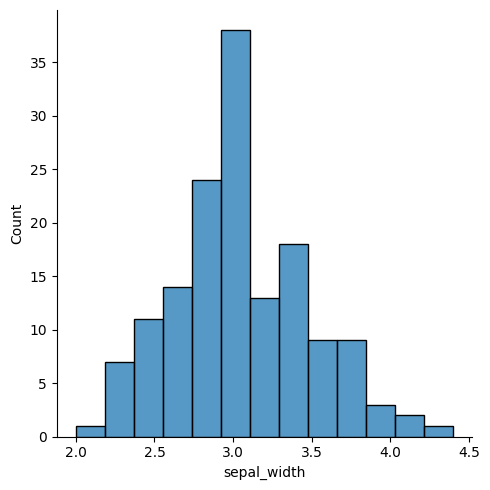

In [128]:
plt.figure(figsize=(10, 7))
sns.displot(iris, x='sepal_width')

<Axes: xlabel='petal_width', ylabel='Count'>

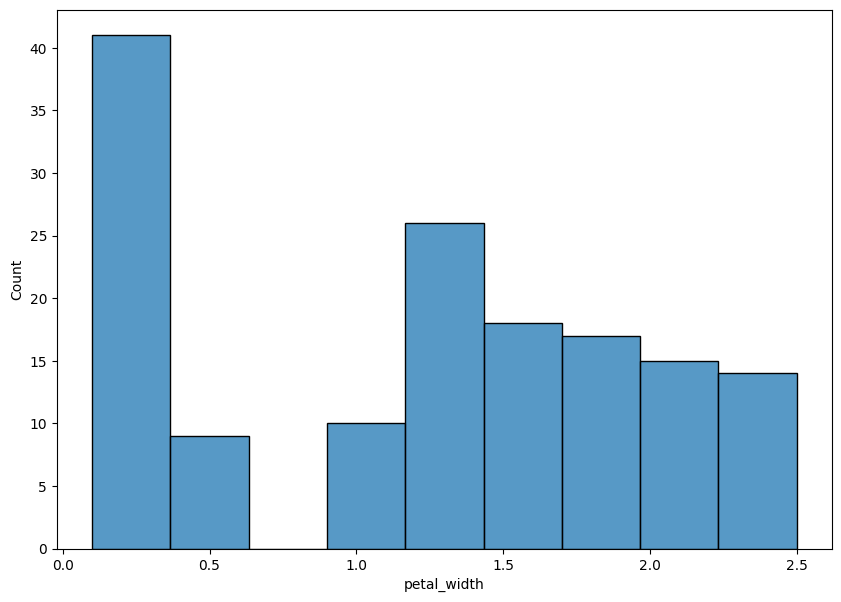

In [129]:
plt.figure(figsize=(10, 7))
sns.histplot(iris, x='petal_width')

In [130]:
iris['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [131]:
iris['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [132]:
df0 = iris[:50] # Iris-setosa
df1 = iris[50:100] # Iris-versicolor
df2 = iris[100:150] # Iris-virginica

Sepal Length vs Sepal Width (Versicolor vs Setosa)

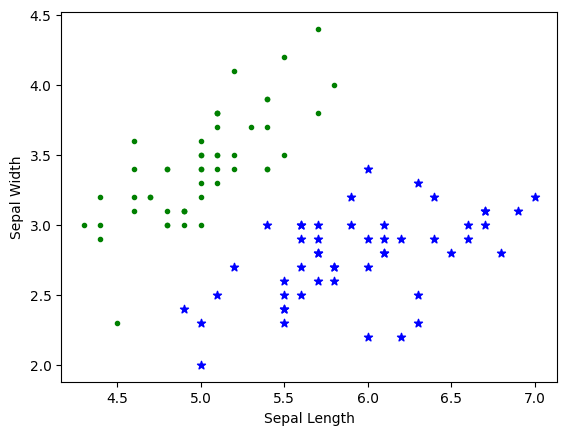

In [133]:
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.scatter(df0['sepal_length'], df0['sepal_width'], color="green", marker='.') # Iris-setosa
plt.scatter(df1['sepal_length'], df1['sepal_width'], color="blue", marker='*') # Iris-versicolor

petal length vs petal Width (Versicolor vs Virginica)

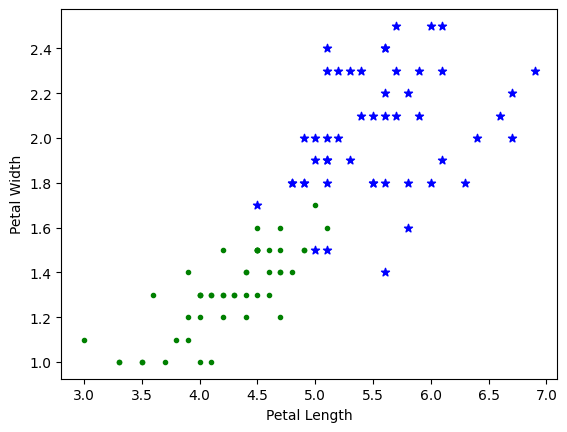

In [134]:
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.scatter(df1['petal_length'], df1['petal_width'], color="green", marker='.') # Iris-versicolor
plt.scatter(df2['petal_length'], df2['petal_width'], color="blue", marker='*') # Iris-virginica

In [135]:
# Label Encoding: used to convert categorical column into numerical ones to bring them into machine readable form 
# Here we will convert the species column which is our target variable into numeric form.
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
iris['species_numeric'] = le.fit_transform(iris['species'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_numeric
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


## Train Test Split 

In [136]:
# import the train test split model
from sklearn.model_selection import train_test_split

In [137]:
# assign x and y 
# x = features
# y = target
x = iris.drop(['species', 'species_numeric'], axis='columns') # features
y = iris['species_numeric']

In [138]:
# split the train df and test df with 30% of entire data to test size
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [139]:
x_train.shape

(120, 4)

In [140]:
x_test.shape

(30, 4)

In [141]:
# import the machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [142]:
knn = KNeighborsClassifier(n_neighbors=20)

In [143]:
# train the model with the training dataset
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [144]:
y_pred = knn.predict(x_test)
knn_absolute_error = mean_absolute_error(y_test,y_pred)
knn_squared_error = mean_squared_error(y_test,y_pred)
knn_score = r2_score(y_test,y_pred)
print("Mean Absolute Error:", knn_absolute_error)
print("Mean Squared Error:", knn_squared_error)
print("R-squared:", knn_score)

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
R-squared: 1.0


In [145]:
# Logistic regression machine learning model
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [146]:
y_pred = lr.predict(x_test)
linear_absolute_error = mean_absolute_error(y_test,y_pred)
linear_squared_error = mean_squared_error(y_test,y_pred)
linear_score = r2_score(y_test,y_pred)
print("Mean Absolute Error:", linear_absolute_error)
print("Mean Squared Error:", linear_squared_error)
print("R-squared:", linear_score)

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
R-squared: 1.0


In [147]:
# decision tree classifier
dt = DecisionTreeClassifier()

In [148]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [149]:
dt.score(x_test, y_test)

1.0